In [1]:
# Python 2, 3 version 호환
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
# Import data
import pandas as pd
data = pd.read_csv("./BreastCancerWisconsin.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

- Data has 569 rows and 31 columns.
- Column names:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


In [3]:
# Split data into X and y; the 'diagnosis' column is the class label
# Only the first 10 columns will be used
X = data.drop(['diagnosis'], axis=1)
X = X.iloc[:, :10]
y = data['diagnosis']

In [4]:
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

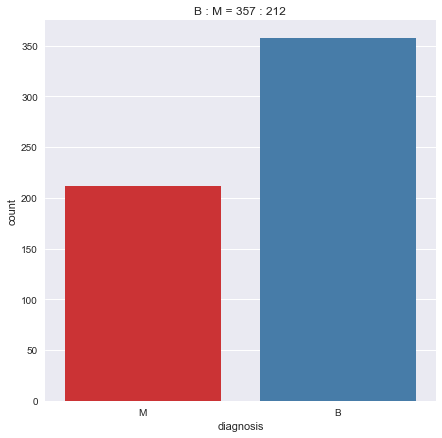

In [6]:
# Check class label distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.countplot(y, palette='Set1', ax=ax)
ax.set_title("B : M = {} : {}".format(*y.value_counts()))
plt.show()

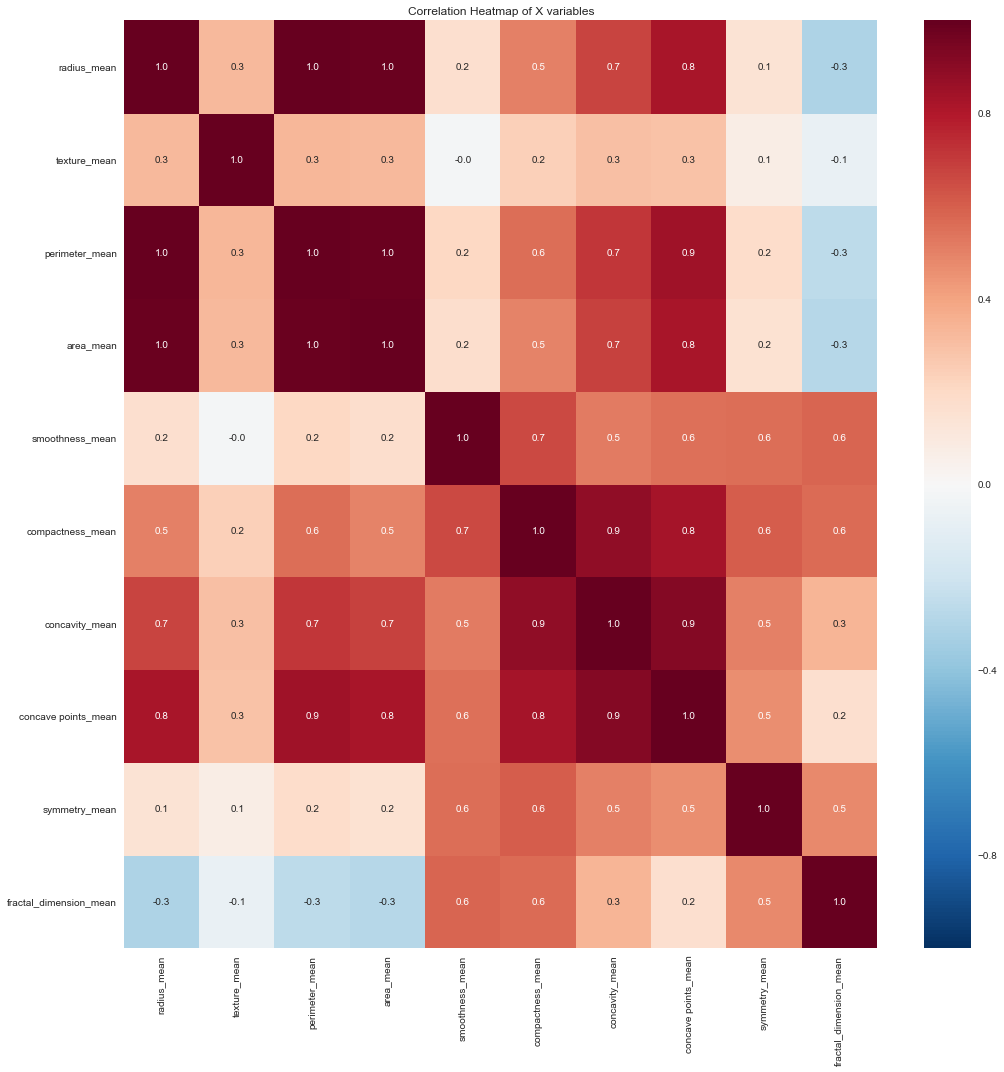

In [7]:
# Check correlation among X variables
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax = sns.heatmap(X.corr(), annot=True, fmt='.1f')
ax.set_title("Correlation Heatmap of X variables")
plt.tight_layout()
plt.show(fig)

In [8]:
from sklearn.model_selection import train_test_split
# Split dataset into train (80%) & validation (10%) & test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/10,
                                                    stratify=y,
                                                    random_state=19810521)

In [9]:
from sklearn.preprocessing import StandardScaler
# Standardize dataset columnwise, to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train[:,0:2]

array([[ 0.46883538,  0.89894365],
       [-0.90675673, -1.47327543],
       [-0.30276776, -1.17906466],
       ...,
       [-0.33455665,  2.22405041],
       [ 0.06713936,  0.74836334],
       [-0.1293738 ,  0.58388331]])

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Instantiate a Decision Tree classifier with arbitrary tree depth
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
# Fit on training set
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# Predict labels of train & validation sets
y_train_pred = clf_dt.predict(X_train)
y_test_pred = clf_dt.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, f1_score
# Show train & validation accuracies
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))

- Accuracy (Train)      : 1.0
- Accuracy (Validation) : 0.9649


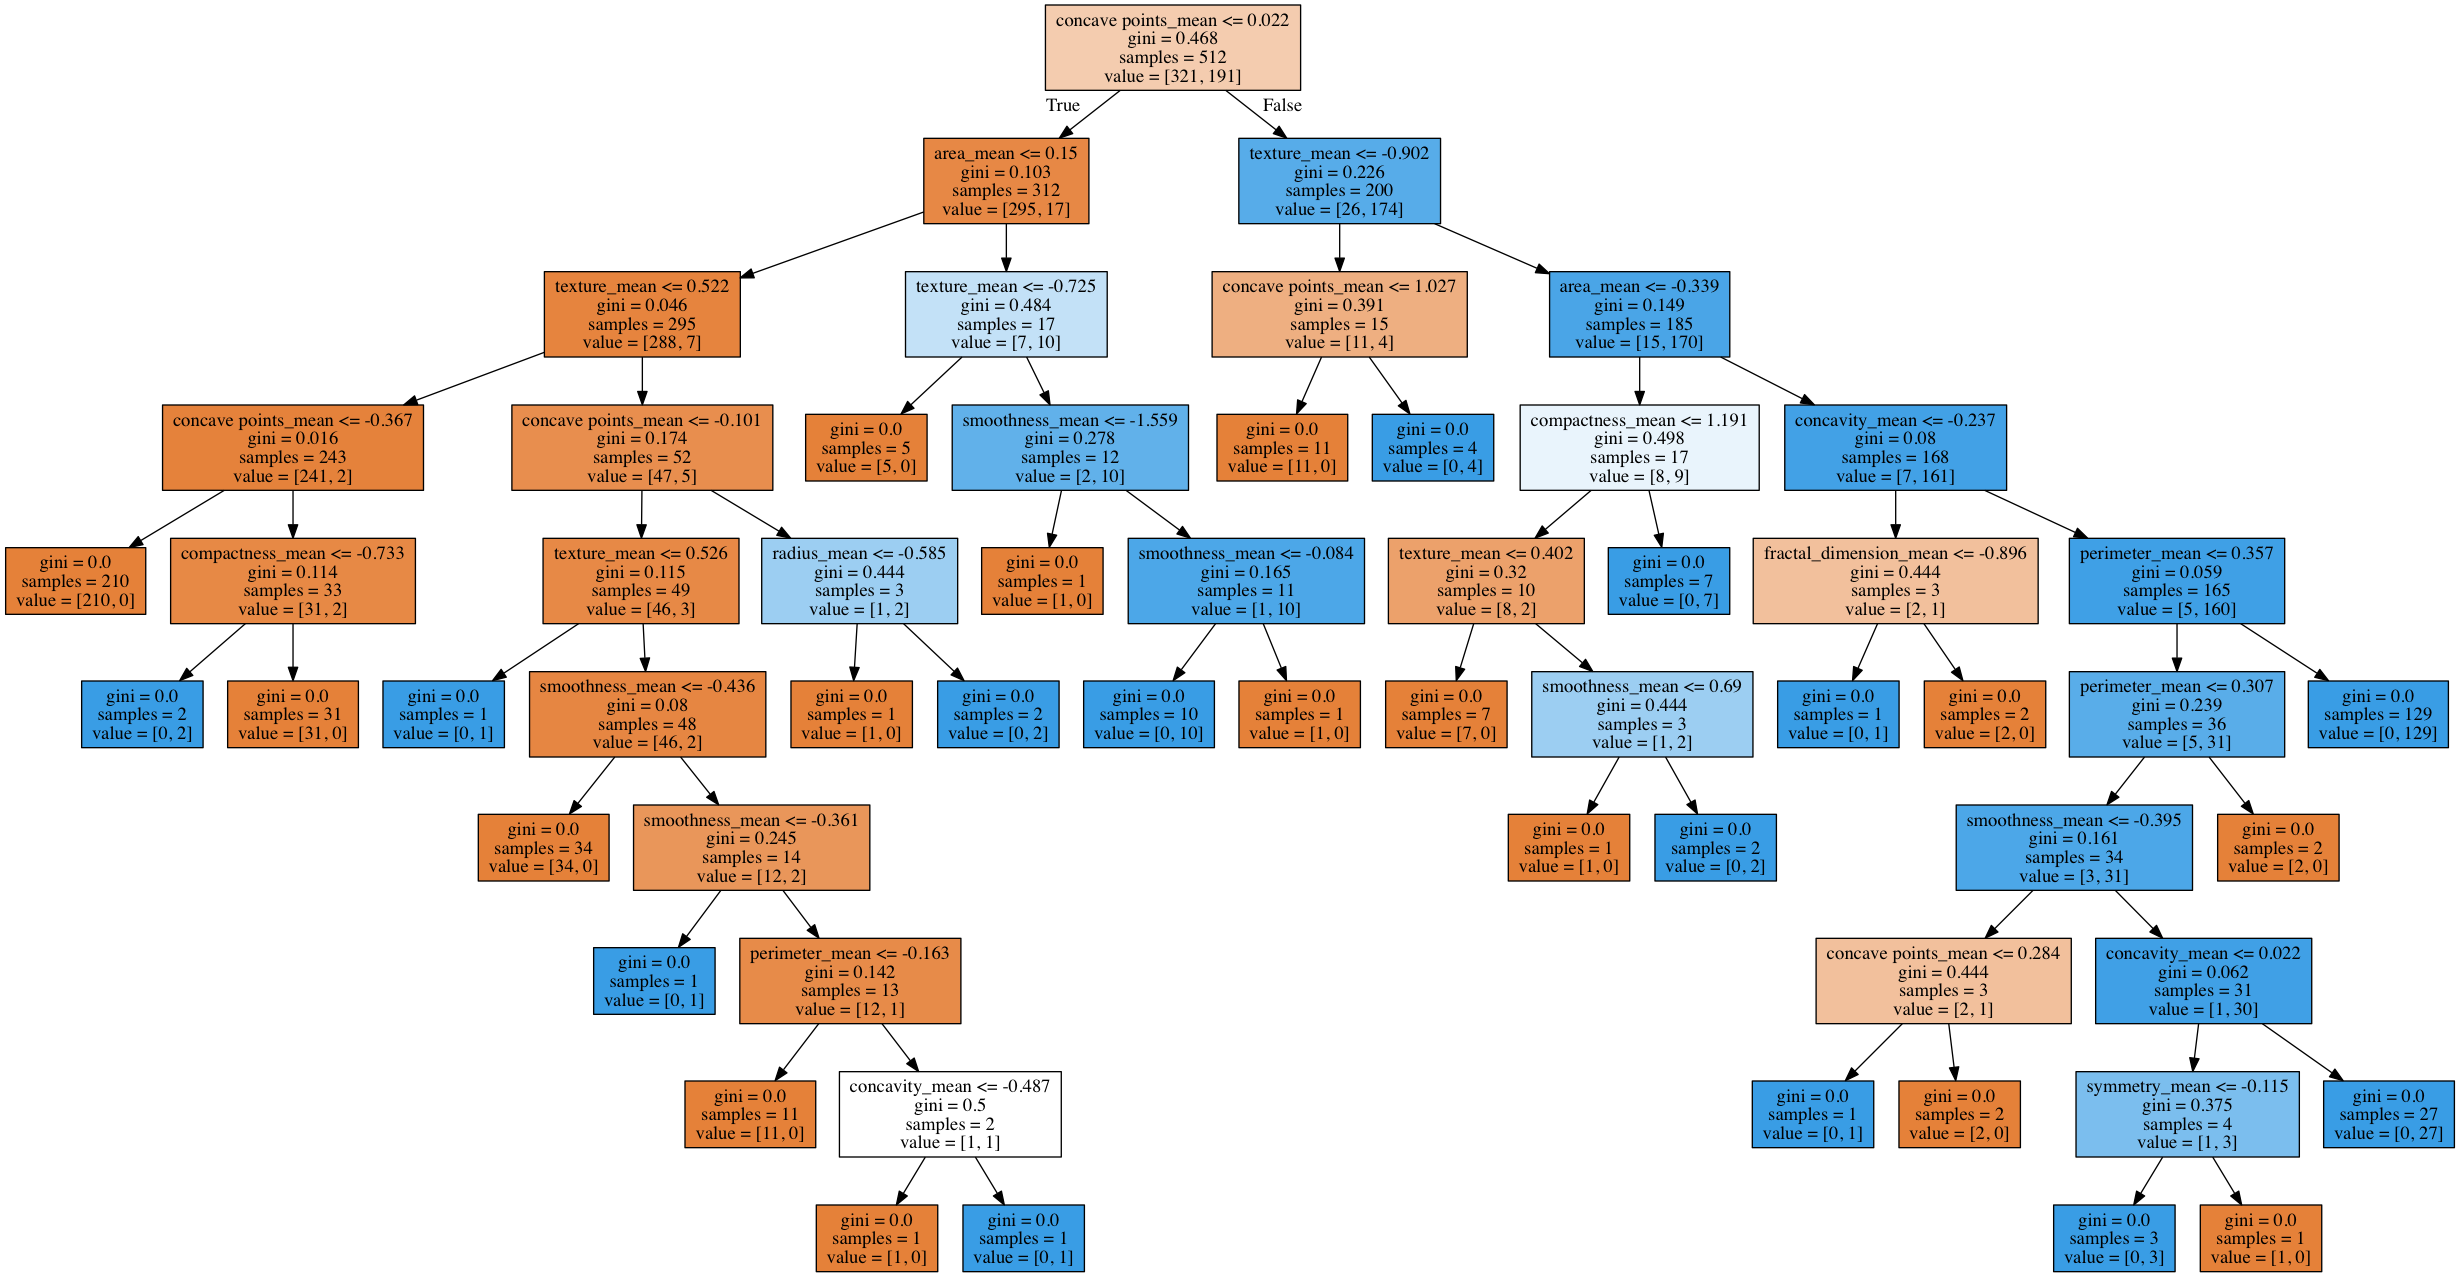

In [22]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import Image
# Plot decision tree graph
graph = Source(export_graphviz(clf_dt,
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))

In [23]:
# Find the best 'max_depth' parameter
max_depths = list(range(1, 9, 1))
validation_accs = []
validation_f1 = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    clf_dt.fit(X_train, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid)
    validation_accs.append(accuracy_score(y_valid, y_valid_pred))
    validation_f1.append(f1_score(y_valid, y_valid_pred, pos_label='M'))


NameError: name 'X_valid' is not defined